In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("c:\\Users\\ASUS\\Downloads\\retail_store_sales.csv")

In [ ]:

#Understanding the structure and missing values

print(df.columns)
print(df.isnull().sum())
print(df.describe())
print(df.shape)

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')
Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64
       Price Per Unit      Quantity   Total Spent
count    11966.000000  11971.000000  11971.000000
mean        23.365912      5.536380    129.652577
std         10.743519      2.857883     94.750697
min          5.000000      1.000000      5.000000
25%         14.000000      3.000000     51.000000
50%         23.000000      6.000000    108.500000
75%         33.500000      8.000000    192.000000
max         41.000000     10.000000    410.000000
(12575, 11)


In [ ]:
#First Five Rows from each columns
print(df.head())

  Transaction ID Customer ID       Category          Item  Price Per Unit  \
0    TXN_6867343     CUST_09     Patisserie   Item_10_Pat            18.5   
1    TXN_3731986     CUST_22  Milk Products  Item_17_Milk            29.0   
2    TXN_9303719     CUST_02       Butchers   Item_12_But            21.5   
3    TXN_9458126     CUST_06      Beverages   Item_16_Bev            27.5   
4    TXN_4575373     CUST_05           Food   Item_6_Food            12.5   

   Quantity  Total Spent  Payment Method Location Transaction Date  \
0      10.0        185.0  Digital Wallet   Online       2024-04-08   
1       9.0        261.0  Digital Wallet   Online       2023-07-23   
2       2.0         43.0     Credit Card   Online       2022-10-05   
3       9.0        247.5     Credit Card   Online       2022-05-07   
4       7.0         87.5  Digital Wallet   Online       2022-10-02   

  Discount Applied    Month  
0             True  2024-04  
1             True  2023-07  
2            False  2022-1

In [ ]:
#Filling missing item
df["Item"] = df["Item"].fillna("Unknown")

# Fill Quantity if missing
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

# Fill Price Per Unit if missing
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())

#Filling null discount with 0
df["Discount Applied"] = df["Discount Applied"].fillna(0)

#The best default choice for missing data is median.

In [ ]:
#Recalculation Total Spent
df["Total Spent"] = df["Quantity"] * df["Price Per Unit"]
#Converting date and time to pandas datetime structure
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')


In [ ]:
#Removing extra spaces
text_columns = ['Category', 'Item', 'Payment Method', 'Location']

for col in text_columns:
    df[col] = df[col].str.strip().str.title()


In [23]:
print(df.describe())
print(df['Category'].value_counts())
print(df['Payment Method'].value_counts())


       Price Per Unit      Quantity   Total Spent  \
count    12575.000000  12575.000000  12575.000000   
mean        23.348191      5.558648    130.114950   
min          5.000000      1.000000      5.000000   
25%         14.000000      3.000000     55.000000   
50%         23.000000      6.000000    111.000000   
75%         32.000000      8.000000    192.000000   
max         41.000000     10.000000    410.000000   
std         10.480413      2.790160     92.327187   

                    Transaction Date  
count                          12575  
mean   2023-07-12 20:23:41.105368064  
min              2022-01-01 00:00:00  
25%              2022-09-30 00:00:00  
50%              2023-07-13 00:00:00  
75%              2024-04-24 00:00:00  
max              2025-01-18 00:00:00  
std                              NaN  
Category
Electric Household Essentials         1591
Furniture                             1591
Food                                  1588
Milk Products                    

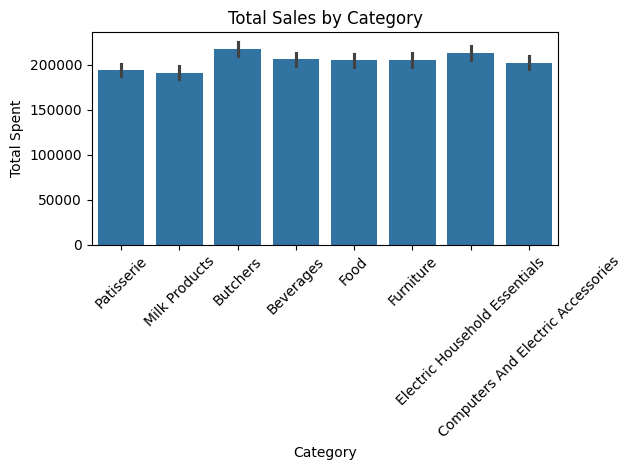

In [42]:
import seaborn as sns

# Total spent per category
sns.barplot(x='Category', y='Total Spent', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Buthers and Electirc household essentials were the most sold products.


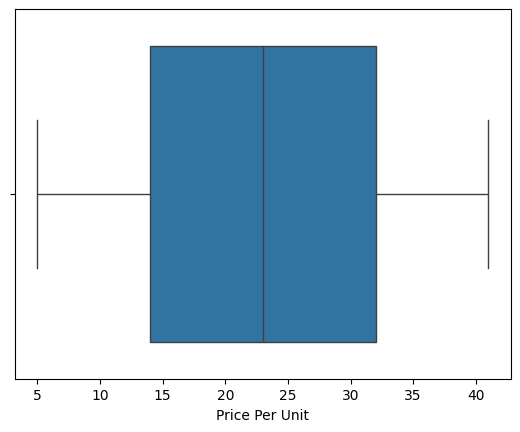

In [25]:

sns.boxplot(x=df['Price Per Unit'])
plt.show()


Average price per unit was aroud 22.5 and Q3 was 40 and Q1 was 5.

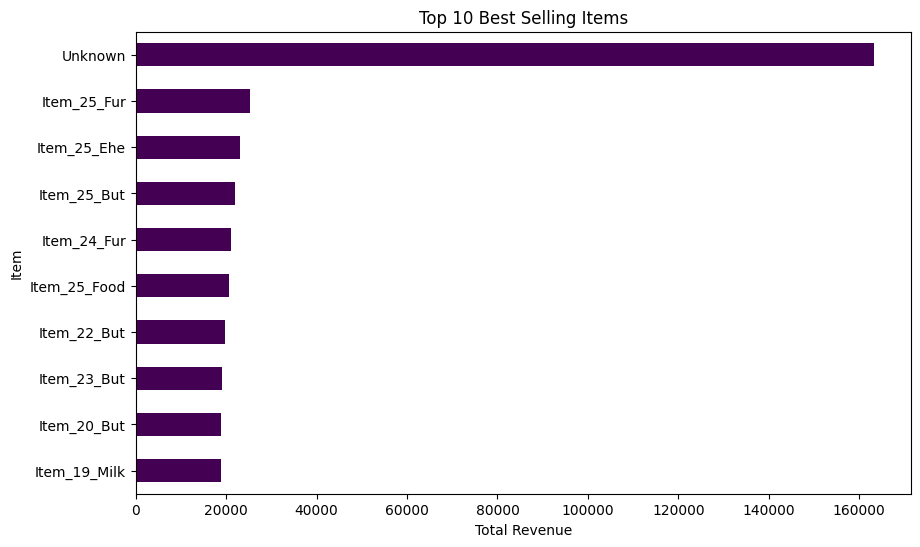

In [30]:
top_items = df.groupby('Item')['Total Spent'].sum().nlargest(10)

top_items.plot(kind='barh', title='Top 10 Best Selling Items', figsize=(10,6), colormap='viridis')
plt.xlabel('Total Revenue')
plt.gca().invert_yaxis()
plt.show()


Missing Items were a lot thus resulting into top selling items

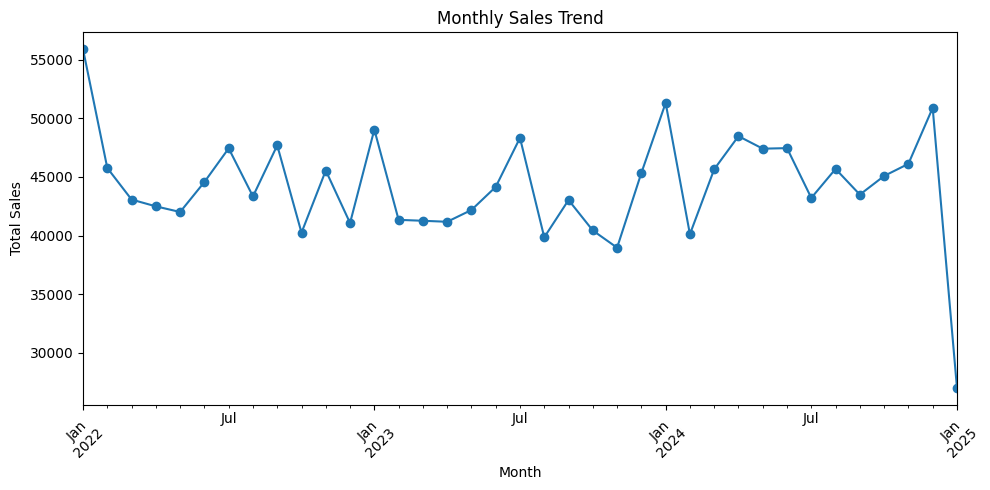

In [31]:
df['Month'] = df['Transaction Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Spent'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


There was fluctuation in Sales per month.But, in 2025 the sales went completely to bottom.

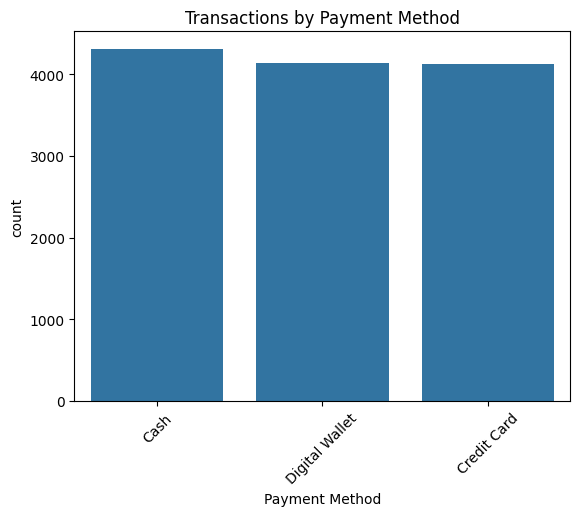

In [32]:
sns.countplot(x='Payment Method', data=df, order=df['Payment Method'].value_counts().index)
plt.title('Transactions by Payment Method')
plt.xticks(rotation=45)
plt.show()


Cash was the most used payment method compare to digital wallet and credit card.

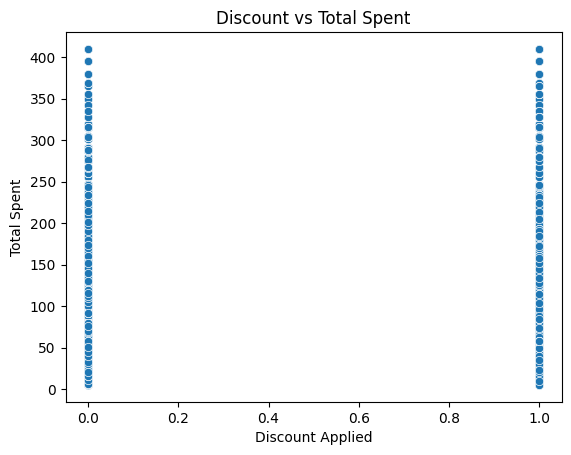

In [34]:
sns.scatterplot(x='Discount Applied', y='Total Spent', data=df)
plt.title('Discount vs Total Spent')
plt.show()


As we gave more dicount to customer the total spent by customer was rising.

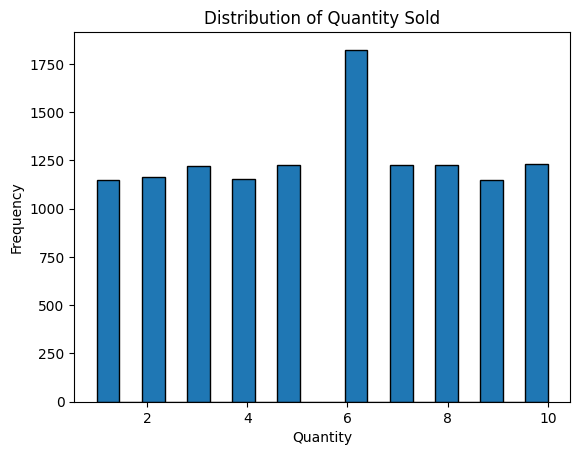

In [35]:
plt.hist(df['Quantity'], bins=20, edgecolor='black')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


Combination of 6different items was purchased must.

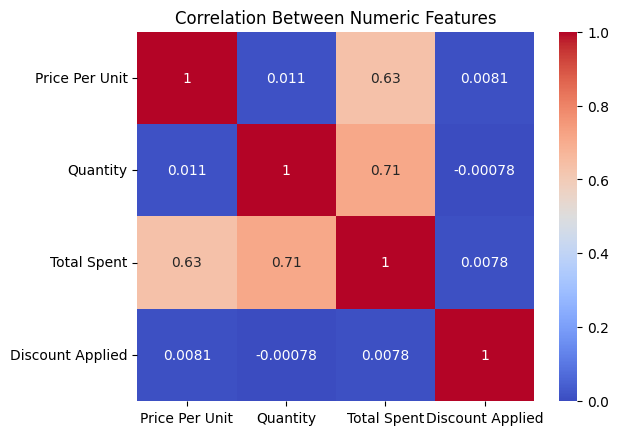

In [37]:
sns.heatmap(df[['Price Per Unit', 'Quantity', 'Total Spent', 'Discount Applied']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()


There is high degree of correlation between quantiy and total spent.If Quantity rises total spend also rises.

The store's revenue is driven largely by a few high-selling categories. Most transactions occur with minimal quantity but high unit prices. Discounts don’t strongly affect revenue, and missing item data could affect top-selling item accuracy. Overall, the dataset is clean and ready for business insight reporting.